<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

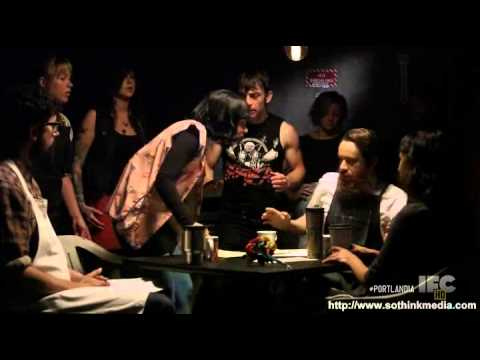

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [1]:
%pwd

'C:\\Users\\James\\Desktop\\Lambda_Stuff\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import string
from spacy.tokenizer import Tokenizer

In [3]:
#load the nlp model, create a tokenizer instance

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [4]:
df['full_review_text'] = df['full_review_text'].str.replace(r'\d+/\d+/\d+', "")

In [5]:
table = str.maketrans(dict.fromkeys(string.punctuation))
df['full_review_text'] = df['full_review_text'].str.translate(table)

In [6]:
tokens = []

#create tokens for full review text, remove stop words, numbers, punctuation
for doc in tokenizer.pipe(df['full_review_text']):

    doc_tokens = []

    for token in doc:
        if (token.is_stop==False) & (token.is_alpha==True) & (token.pos_!='PROPN'):
            doc_tokens.append(token.lemma_.lower())
    
    tokens.append(doc_tokens)
df['tokens'] = tokens

In [7]:
rates = []
for doc in tokenizer.pipe(df['star_rating']):
    rates.append(doc[1].text)
    
df['star_rating'] = [float(r) for r in rates]

In [8]:
df.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Eve...,5.0,"[checkin, love, love, love, atmosphere, corner..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Aust...,4.0,"[listed, date, night, austin, ambiance, austin..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the...,4.0,"[checkin, listed, brunch, spots, love, eclecti..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Ho...,2.0,"[cool, decor, good, drink, nice, seat, overpri..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northc...,4.0,"[checkin, locate, northcross, mall, shop, cent..."


In [20]:
# create adjective-noun pairs from reviews
adj_noun = []

for doc in df['full_review_text']:
    doc = nlp(doc)
    clusters = []
    bound = len(doc)-1
    for index, token in enumerate(doc):
        next_ind = index+1
        if (next_ind) < bound:
            if (token.pos_=='ADJ') & (doc[next_ind].pos_=='NOUN'):
                clusters.append(f'{token.text.lower()}  {doc[next_ind].text.lower()}')
    adj_noun.append(clusters)

df['clusters'] = adj_noun

In [ ]:
x = "the brown fox and nice person"
doc = nlp(x)


In [21]:
df.head()

,coffee_shop_name,full_review_text,star_rating,tokens,clusters
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Eve...,5.0,"[checkin, love, love, love, atmosphere, corner...","[own style, typical heart]"
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Aust...,4.0,"[listed, date, night, austin, ambiance, austin...",[pretty penny]
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the...,4.0,"[checkin, listed, brunch, spots, love, eclecti...","[plush decor, pricier coffee, ample parking..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Ho...,2.0,"[cool, decor, good, drink, nice, seat, overpri...","[cool decor, nice seating, french oldies, l..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northc...,4.0,"[checkin, locate, northcross, mall, shop, cent...","[computerized user, friendly ordering, tart ..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [22]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [27]:
good_rev = df[df["star_rating"]>=4].copy()
bad_rev = df[df["star_rating"]<=3].copy()

good_count = count(good_rev['clusters'])
good_count

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
5,great place,330,348,1.0,0.011643,0.011643,0.053746
194,great coffee,330,340,2.0,0.011375,0.023019,0.053746
273,good coffee,254,276,3.0,0.009234,0.032253,0.041368
12,cold brew,179,221,4.0,0.007394,0.039647,0.029153
72,first time,187,194,5.0,0.006491,0.046137,0.030456
75,favorite coffee,167,169,6.0,0.005654,0.051792,0.027199
675,outdoor seating,165,169,7.0,0.005654,0.057446,0.026873
91,friendly staff,145,147,8.0,0.004918,0.062364,0.023616
47,best coffee,135,140,9.0,0.004684,0.067048,0.021987
199,next time,139,140,10.0,0.004684,0.071732,0.022638


In [28]:
bad_count = count(bad_rev['clusters'])
bad_count

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
98,good coffee,61,61,1.0,0.008641,0.008641,0.041328
109,first time,53,53,2.0,0.007508,0.016150,0.035908
115,iced coffee,36,45,3.0,0.006375,0.022524,0.024390
43,good place,40,42,4.0,0.005950,0.028474,0.027100
17,other coffee,39,39,5.0,0.005525,0.033999,0.026423
37,great place,35,39,6.0,0.005525,0.039524,0.023713
134,great coffee,38,39,7.0,0.005525,0.045049,0.025745
156,hot chocolate,17,33,8.0,0.004675,0.049724,0.011518
104,cold brew,24,31,9.0,0.004392,0.054115,0.016260
239,next time,30,30,10.0,0.004250,0.058365,0.020325


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

